In [ ]:
!pip install feature_engine==0.6

In [1]:
import pandas as pd
import numpy as np

# to split the datasets
from sklearn.model_selection import train_test_split

# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

# for integer encoding using sklearn
from sklearn.preprocessing import OrdinalEncoder

# to encode with feature-engine
from feature_engine.categorical_encoders import CountFrequencyCategoricalEncoder, OrdinalCategoricalEncoder

# for encoding using feature-engine
from feature_engine.categorical_encoders import WoERatioCategoricalEncoder
from feature_engine.categorical_encoders import MeanCategoricalEncoder

import matplotlib.pyplot as plt



# One Hot Encodeing

In [2]:
# let's load the data set

data = pd.read_csv('https://raw.githubusercontent.com/univai-ghf/FeatureProcessingAndSelectionWorkshop/main/Data/creditApprovalUCI.csv')
data.dropna(inplace=True)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [3]:
# make a list with the categorical variables

vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [4]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 15), (207, 15))

## One Hot Encoding with pandas

In [5]:
# let's inspect the unique values of A4

X_train['A4'].unique()

array(['u', 'y', 'Missing', 'l'], dtype=object)

In [6]:
# let's one hot encode A4

tmp = pd.get_dummies(X_train['A4'], drop_first=True)

print(tmp.head())

     l  u  y
596  0  1  0
303  0  1  0
204  0  0  1
351  0  0  1
118  0  1  0


In [7]:
# now let's encode all cateogrical variables together: train set

X_train_enc = pd.get_dummies(X_train[vars_categorical], drop_first=True)

print(X_train_enc.head())

     A1_a  A1_b  A4_l  A4_u  A4_y  A5_g  A5_gg  A5_p  A6_aa  A6_c  ...  A7_j  \
596     1     0     0     1     0     1      0     0      0     1  ...     0   
303     1     0     0     1     0     1      0     0      0     0  ...     0   
204     0     1     0     0     1     0      0     1      0     0  ...     0   
351     0     1     0     0     1     0      0     1      0     0  ...     0   
118     0     1     0     1     0     1      0     0      0     0  ...     0   

     A7_n  A7_o  A7_v  A7_z  A9_t  A10_t  A12_t  A13_p  A13_s  
596     0     0     1     0     1      1      1      0      0  
303     0     0     1     0     0      0      0      0      0  
204     0     0     1     0     1      1      0      0      0  
351     0     0     0     0     0      0      0      0      0  
118     0     0     1     0     1      1      1      0      0  

[5 rows x 36 columns]


In [8]:
# and in the test set

X_test_enc = pd.get_dummies(X_test[vars_categorical], drop_first=True)

X_test_enc.head()

,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
14,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0
586,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
140,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
492,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
350,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


## One Hot Encoding with Scikit-learn

In [9]:
# we create and train the encoder

encoder = OneHotEncoder(categories='auto',
                        drop='first',  # to return k-1, use frop=false to return k dummies
                        sparse=False)

In [10]:
# fit the encoder to the train set: it will learn the categories to encode

encoder.fit(X_train[vars_categorical])

OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [11]:
# transform the train and test sets

X_train_enc = encoder.transform(X_train[vars_categorical])
X_test_enc = encoder.transform(X_test[vars_categorical])

In [12]:
# let's inspect the train set

print(pd.DataFrame(X_train_enc).head())

    0    1    2    3    4    5    6    7    8    9   ...   26   27   28   29  \
0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  1.0   
1  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
2  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   

    30   31   32   33   34   35  
0  0.0  1.0  1.0  1.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  1.0  1.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  1.0  1.0  1.0  0.0  0.0  

[5 rows x 36 columns]


In [13]:
# let's inspect the test set

pd.DataFrame(X_test_enc).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## One hot encoding with Feature-Engine

In [14]:
# let's create the encoder

ohe_enc = OneHotCategoricalEncoder(
    top_categories=None,
    drop_last=True)  # to return k-1, false to return k

In [15]:
# fit the encoder to the train set: it will learn the variables and 
# categories to encode

ohe_enc.fit(X_train)

OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                         variables=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10',
                                    'A12', 'A13'])

In [16]:
# we can see which variables the encoder will encode

ohe_enc.variables

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [17]:
# let's transform train and test set

X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [18]:
# let's inspect the encoded train set

X_train_enc.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_u,A4_y,...,A7_z,A7_bb,A7_j,A7_Missing,A7_n,A9_t,A10_t,A12_t,A13_g,A13_s
596,46.08,3.000,2.375,8,396.0,4159,1,0,1,0,...,0,0,0,0,0,1,1,1,1,0
303,15.92,2.875,0.085,0,120.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
204,36.33,2.125,0.085,1,50.0,1187,0,1,0,1,...,0,0,0,0,0,1,1,0,1,0
351,22.17,0.585,0.000,0,100.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
118,57.83,7.040,14.000,6,360.0,1332,0,1,1,0,...,0,0,0,0,0,1,1,1,1,0


In [19]:
# let's inspect the encoded test set

X_test_enc.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_u,A4_y,...,A7_z,A7_bb,A7_j,A7_Missing,A7_n,A9_t,A10_t,A12_t,A13_g,A13_s
14,45.83,10.50,5.000,7,0.0,0,1,0,1,0,...,0,0,0,0,0,1,1,1,1,0
586,64.08,20.00,17.500,9,0.0,1000,0,1,1,0,...,0,0,0,0,0,1,1,1,1,0
140,31.25,3.75,0.625,9,181.0,0,1,0,1,0,...,0,0,0,0,0,1,1,1,1,0
492,39.25,9.50,6.500,14,240.0,4607,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
350,26.17,2.00,0.000,0,276.0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0


# One Hot Encoding Top Categories

In [2]:
# let's load the data set

data = pd.read_csv('https://raw.githubusercontent.com/univai-ghf/FeatureProcessingAndSelectionWorkshop/main/Data/creditApprovalUCI.csv')
data.dropna(inplace=True)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [3]:
# make a list with the categorical variables

vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 15), (207, 15))

## One Hot Encoding of top categories with pandas

In [5]:
# let's inspect the unique categories of A6

X_train['A6'].unique()

array(['c', 'q', 'w', 'ff', 'm', 'i', 'e', 'cc', 'x', 'd', 'k', 'j',
       'Missing', 'aa', 'r'], dtype=object)

In [6]:
# let's find the top 5 most frequent categories in A6

X_train['A6'].value_counts().sort_values(ascending=False).head(5)

c    93
q    56
w    48
i    41
k    38
Name: A6, dtype: int64

In [7]:
# let's make a list with the most frequent categories in A6

top_5 = [
    x for x in X_train['A6'].value_counts().sort_values(
        ascending=False).head(5).index
]

top_5

['c', 'q', 'w', 'i', 'k']

In [8]:
# and now let's create 5 binary variables to encode A6
# in train and test sets

for label in top_5:
    X_train['A6' + '_' + label] = np.where(
        X_train['A6'] == label, 1, 0)
    
    X_test['A6' + '_' + label] = np.where(
        X_test['A6'] == label, 1, 0)

In [9]:
# let's visualise the result

print(X_train[['A6'] + ['A6'+'_'+c for c in top_5]].head(10))

     A6  A6_c  A6_q  A6_w  A6_i  A6_k
596   c     1     0     0     0     0
303   q     0     1     0     0     0
204   w     0     0     1     0     0
351  ff     0     0     0     0     0
118   m     0     0     0     0     0
247   q     0     1     0     0     0
652   i     0     0     0     1     0
513   e     0     0     0     0     0
230  cc     0     0     0     0     0
250   e     0     0     0     0     0


## One Hot Encoding of top categories with Feature-Engine

In [10]:
# let's divide in train and test sets (again)

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

In [11]:
ohe_enc = OneHotCategoricalEncoder(
    
    # to indicate how many top categories
    top_categories=5,  
    
    # we can select which variables to encode
    variables=['A6', 'A7'],
    
    # to indicate if we drop one of the binaries
    drop_last=False)

ohe_enc.fit(X_train)

OneHotCategoricalEncoder(drop_last=False, top_categories=5,
                         variables=['A6', 'A7'])

In [12]:
# the encoder stores the variables it will encode

ohe_enc.variables

['A6', 'A7']

In [13]:
# the encoder stores the most frequent labels per variable

ohe_enc.encoder_dict_

{'A6': ['c', 'q', 'w', 'i', 'k'], 'A7': ['v', 'h', 'ff', 'bb', 'z']}

In [14]:
# let's transform train and test sets

X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [15]:
# let's inspect the result

X_train_enc.head()

,A1,A2,A3,A4,A5,A8,A9,A10,A11,A12,...,A6_c,A6_q,A6_w,A6_i,A6_k,A7_v,A7_h,A7_ff,A7_bb,A7_z
596,a,46.08,3.000,u,g,2.375,t,t,8,t,...,1,0,0,0,0,1,0,0,0,0
303,a,15.92,2.875,u,g,0.085,f,f,0,f,...,0,1,0,0,0,1,0,0,0,0
204,b,36.33,2.125,y,p,0.085,t,t,1,f,...,0,0,1,0,0,1,0,0,0,0
351,b,22.17,0.585,y,p,0.000,f,f,0,f,...,0,0,0,0,0,0,0,1,0,0
118,b,57.83,7.040,u,g,14.000,t,t,6,t,...,0,0,0,0,0,1,0,0,0,0


In [16]:
X_test_enc.head()

,A1,A2,A3,A4,A5,A8,A9,A10,A11,A12,...,A6_c,A6_q,A6_w,A6_i,A6_k,A7_v,A7_h,A7_ff,A7_bb,A7_z
14,a,45.83,10.50,u,g,5.000,t,t,7,t,...,0,1,0,0,0,1,0,0,0,0
586,b,64.08,20.00,u,g,17.500,t,t,9,t,...,0,0,0,0,0,0,1,0,0,0
140,a,31.25,3.75,u,g,0.625,t,t,9,t,...,0,0,0,0,0,0,1,0,0,0
492,b,39.25,9.50,u,g,6.500,t,t,14,f,...,0,0,0,0,0,1,0,0,0,0
350,a,26.17,2.00,u,g,0.000,f,f,0,t,...,0,0,0,0,0,0,0,0,0,0


# Replacing Categories by Ordinal Numbers

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/univai-ghf/FeatureProcessingAndSelectionWorkshop/main/Data/creditApprovalUCI.csv')
data.dropna(inplace=True)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [3]:
# make a list with the categorical variables

vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 15), (207, 15))

## Ordinal encoding with pandas

In [5]:
# let's create a dictionary with the mappings of categories to numbers for A7

ordinal_mapping = {
    k: i
    for i, k in enumerate(X_train['A7'].unique(), 0)
}

ordinal_mapping

{'v': 0,
 'ff': 1,
 'h': 2,
 'dd': 3,
 'z': 4,
 'bb': 5,
 'j': 6,
 'Missing': 7,
 'n': 8,
 'o': 9}

In [6]:
# replace the labels with the integers

X_train['A7'] = X_train['A7'].map(ordinal_mapping)
X_test['A7'] = X_test['A7'].map(ordinal_mapping)

In [7]:
# let's explore the result

X_train['A7'].head(10)

596    0
303    0
204    0
351    1
118    0
247    2
652    0
513    3
230    0
250    4
Name: A7, dtype: int64

### Putting the code in a function

In [8]:
# we can turn the previous commands into 2 functions

def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique(), 0)}


def integer_encode(train, test, variable, ordinal_mapping):

    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)

In [9]:
# and now we run a loop over the remaining categorical variables
# and encode them to numbers

for variable in vars_categorical:
    
    if variable != 'A7':  # we encoded this one already
        
        mappings = find_category_mappings(X_train, variable)
        
        integer_encode(X_train, X_test, variable, mappings)

In [10]:
# let's inspect the results

X_train[vars_categorical].head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13
596,0,0,0,0,0,0,0,0,0
303,0,0,0,1,0,1,1,1,0
204,1,1,1,2,0,0,0,1,0
351,1,1,1,3,1,1,1,1,0
118,1,0,0,4,0,0,0,0,0


## Ordinal encoding with Scikit-learn

In [11]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 15), (207, 15))

In [12]:
# let's create an encoder

le = OrdinalEncoder()

In [13]:
# let's fit the encoder to the train set
le.fit(X_train[vars_categorical])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [14]:
# we can see the unique classes

le.categories_

[array(['Missing', 'a', 'b'], dtype=object),
 array(['Missing', 'l', 'u', 'y'], dtype=object),
 array(['Missing', 'g', 'gg', 'p'], dtype=object),
 array(['Missing', 'aa', 'c', 'cc', 'd', 'e', 'ff', 'i', 'j', 'k', 'm',
        'q', 'r', 'w', 'x'], dtype=object),
 array(['Missing', 'bb', 'dd', 'ff', 'h', 'j', 'n', 'o', 'v', 'z'],
       dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['g', 'p', 's'], dtype=object)]

In [15]:
# let's transform train and test sets

X_train_enc = le.transform(X_train[vars_categorical])
X_test_enc = le.transform(X_test[vars_categorical])

In [16]:
#let's inspect the result


pd.DataFrame(X_train_enc, columns=vars_categorical).head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,1.0,2.0,1.0,2.0,8.0,1.0,1.0,1.0,0.0
1,1.0,2.0,1.0,11.0,8.0,0.0,0.0,0.0,0.0
2,2.0,3.0,3.0,13.0,8.0,1.0,1.0,0.0,0.0
3,2.0,3.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,10.0,8.0,1.0,1.0,1.0,0.0


## One hot encoding with Feature-Engine

In [17]:
# let's create the encoder

ordinal_enc = OrdinalCategoricalEncoder(
    encoding_method='arbitrary',
    variables=vars_categorical)

In [18]:
# let's fit the encoder to the train set

ordinal_enc.fit(X_train)

OrdinalCategoricalEncoder(encoding_method='arbitrary',
                          variables=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10',
                                     'A12', 'A13'])

In [19]:
# let's inspect which variables the encoder will encode

ordinal_enc.variables

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [20]:
# in the encoder dict we can observe the numbers
# assigned to each category for all the indicated variables

ordinal_enc.encoder_dict_

{'A1': {'a': 0, 'b': 1, 'Missing': 2},
 'A4': {'u': 0, 'y': 1, 'Missing': 2, 'l': 3},
 'A5': {'g': 0, 'p': 1, 'Missing': 2, 'gg': 3},
 'A6': {'c': 0,
  'q': 1,
  'w': 2,
  'ff': 3,
  'm': 4,
  'i': 5,
  'e': 6,
  'cc': 7,
  'x': 8,
  'd': 9,
  'k': 10,
  'j': 11,
  'Missing': 12,
  'aa': 13,
  'r': 14},
 'A7': {'v': 0,
  'ff': 1,
  'h': 2,
  'dd': 3,
  'z': 4,
  'bb': 5,
  'j': 6,
  'Missing': 7,
  'n': 8,
  'o': 9},
 'A9': {'t': 0, 'f': 1},
 'A10': {'t': 0, 'f': 1},
 'A12': {'t': 0, 'f': 1},
 'A13': {'g': 0, 's': 1, 'p': 2}}

In [21]:
# let's transform the train and test sets

X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [22]:
# let's explore the result

X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,0,46.08,3.000,0,0,0,0,2.375,0,0,8,0,0,396.0,4159
303,0,15.92,2.875,0,0,1,0,0.085,1,1,0,1,0,120.0,0
204,1,36.33,2.125,1,1,2,0,0.085,0,0,1,1,0,50.0,1187
351,1,22.17,0.585,1,1,3,1,0.000,1,1,0,1,0,100.0,0
118,1,57.83,7.040,0,0,4,0,14.000,0,0,6,0,0,360.0,1332


# Replace Categories by Counts Frequencies

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/univai-ghf/FeatureProcessingAndSelectionWorkshop/main/Data/creditApprovalUCI.csv')
data.dropna(inplace=True)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 15), (207, 15))

## Count encoding with pandas

In [4]:
# let's obtain the counts for each category in the variable A7

count_map = X_train['A7'].value_counts().to_dict()

count_map

{'v': 277,
 'h': 101,
 'ff': 41,
 'bb': 39,
 'z': 7,
 'dd': 5,
 'j': 5,
 'Missing': 4,
 'n': 3,
 'o': 1}

In [5]:
# replace the labels with the counts

X_train['A7'] = X_train['A7'].map(count_map)
X_test['A7'] = X_test['A7'].map(count_map)

In [6]:
# let's explore the result

X_train['A7'].head(10)

596    277
303    277
204    277
351     41
118    277
247    101
652    277
513      5
230    277
250      7
Name: A7, dtype: int64

In [7]:
# if instead of the count we would like the frequency
# we need only divide the count by the total number of observations:

frequency_map = (X_train['A6'].value_counts() / len(X_train) ).to_dict()
frequency_map

{'c': 0.19254658385093168,
 'q': 0.11594202898550725,
 'w': 0.09937888198757763,
 'i': 0.08488612836438923,
 'k': 0.07867494824016563,
 'ff': 0.07867494824016563,
 'aa': 0.07039337474120083,
 'cc': 0.062111801242236024,
 'm': 0.053830227743271224,
 'x': 0.049689440993788817,
 'e': 0.043478260869565216,
 'd': 0.043478260869565216,
 'j': 0.016563146997929608,
 'Missing': 0.008281573498964804,
 'r': 0.002070393374741201}

In [8]:
# replace the labels with the frequency

X_train['A6'] = X_train['A6'].map(frequency_map)
X_test['A6'] = X_test['A6'].map(frequency_map)

### Putting the code into functions to smooth the process

In [9]:
def count_mappings(df, variable):
    return df[variable].value_counts().to_dict()


def frequency_mappings(df, variable):
    return (df[variable].value_counts() / len(df)).to_dict()


def encode(train, test, variable, mapping):
    X_train[variable] = X_train[variable].map(mapping)
    X_test[variable] = X_test[variable].map(mapping)

In [10]:
# make a list with the categorical variables

vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [11]:
# encode multiple categorical variables with the functions
# above

for variable in vars_categorical:
    mappings = count_mappings(X_train, variable)
    encode(X_train, X_test, variable, mappings)

## Count and frequency encoding with Feature-Engine

In [12]:
# let's divide into train and test sets (again)

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

In [13]:
# let's create an encoder

count_enc = CountFrequencyCategoricalEncoder(
    encoding_method='count', # to do frequency ==> encoding_method='frequency'
    variables=None)

In [14]:
# fit the encoder to the train set
count_enc.fit(X_train)

CountFrequencyCategoricalEncoder(encoding_method='count',
                                 variables=['A1', 'A4', 'A5', 'A6', 'A7', 'A9',
                                            'A10', 'A12', 'A13'])

In [15]:
# the encoder stores the variables it will encode

count_enc.variables

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [16]:
# in the encoder dict contains the counts or frequencies
# per category per variable

count_enc.encoder_dict_

{'A1': {'b': 335, 'a': 144, 'Missing': 4},
 'A4': {'u': 363, 'y': 115, 'Missing': 4, 'l': 1},
 'A5': {'g': 363, 'p': 115, 'Missing': 4, 'gg': 1},
 'A6': {'c': 93,
  'q': 56,
  'w': 48,
  'i': 41,
  'k': 38,
  'ff': 38,
  'aa': 34,
  'cc': 30,
  'm': 26,
  'x': 24,
  'e': 21,
  'd': 21,
  'j': 8,
  'Missing': 4,
  'r': 1},
 'A7': {'v': 277,
  'h': 101,
  'ff': 41,
  'bb': 39,
  'z': 7,
  'dd': 5,
  'j': 5,
  'Missing': 4,
  'n': 3,
  'o': 1},
 'A9': {'t': 256, 'f': 227},
 'A10': {'f': 271, 't': 212},
 'A12': {'f': 263, 't': 220},
 'A13': {'g': 441, 's': 38, 'p': 4}}

In [17]:
# let's transform train and test sets

X_train_enc = count_enc.transform(X_train)
X_test_enc = count_enc.transform(X_test)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [18]:
# let's inspect the result

X_train_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,144,46.08,3.000,363,363,93,277,2.375,256,212,8,220,441,396.0,4159
303,144,15.92,2.875,363,363,56,277,0.085,227,271,0,263,441,120.0,0
204,335,36.33,2.125,115,115,48,277,0.085,256,212,1,263,441,50.0,1187
351,335,22.17,0.585,115,115,38,41,0.000,227,271,0,263,441,100.0,0
118,335,57.83,7.040,363,363,26,277,14.000,256,212,6,220,441,360.0,1332


In [19]:
X_test_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
14,144,45.83,10.50,363,363,56,277,5.000,256,212,7,220,441,0.0,0
586,335,64.08,20.00,363,363,24,101,17.500,256,212,9,220,441,0.0,1000
140,144,31.25,3.75,363,363,30,101,0.625,256,212,9,220,441,181.0,0
492,335,39.25,9.50,363,363,26,277,6.500,256,212,14,263,441,240.0,4607
350,144,26.17,2.00,363,363,8,5,0.000,227,271,0,220,441,276.0,1


# Ordered Ordinal Encoding

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/univai-ghf/FeatureProcessingAndSelectionWorkshop/main/Data/creditApprovalUCI.csv')
data.dropna(inplace=True)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [3]:
# make a list with the categorical variables

vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,  # all data
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 16), (207, 16))

## Ordered integer encoding with pandas

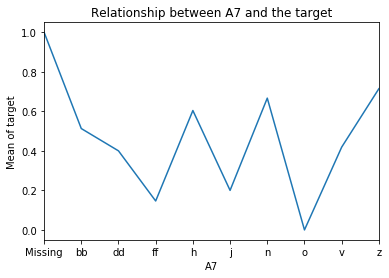

In [5]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

In [6]:
# let's order the labels in A7 according to the mean target value

X_train.groupby(['A7'])['A16'].mean().sort_values()

A7
o          0.000000
ff         0.146341
j          0.200000
dd         0.400000
v          0.418773
bb         0.512821
h          0.603960
n          0.666667
z          0.714286
Missing    1.000000
Name: A16, dtype: float64

In [7]:
# let's we generate an ordered list with the labels of A7

ordered_labels = X_train.groupby(['A7'])['A16'].mean().sort_values().index

ordered_labels

Index(['o', 'ff', 'j', 'dd', 'v', 'bb', 'h', 'n', 'z', 'Missing'], dtype='object', name='A7')

In [8]:
# next let's create a dictionary with the mappings of categories to numbers

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{'o': 0,
 'ff': 1,
 'j': 2,
 'dd': 3,
 'v': 4,
 'bb': 5,
 'h': 6,
 'n': 7,
 'z': 8,
 'Missing': 9}

In [9]:
# replace the labels with the ordered numbers

X_train['A7'] = X_train['A7'].map(ordinal_mapping)
X_test['A7'] = X_test['A7'].map(ordinal_mapping)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
# let's inspect the encoded variable
X_train['A7'].head()

596    4
303    4
204    4
351    1
118    4
Name: A7, dtype: int64

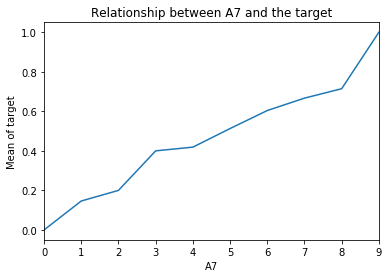

In [11]:
# let's explore the monotonic relationship

X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

## Ordered integer encoding with Feature-Engine

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

In [13]:
# let's create the encoder
ordinal_enc = OrdinalCategoricalEncoder(
    encoding_method='ordered')

In [14]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

ordinal_enc.fit(X_train, y_train)

OrdinalCategoricalEncoder(encoding_method='ordered',
                          variables=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10',
                                     'A12', 'A13'])

In [15]:
# the encoder stores the variables that it will encode

ordinal_enc.variables

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [16]:
# in the encoder dict we can observe the numbers that will
#replace each category in each variable

ordinal_enc.encoder_dict_

{'A1': {'b': 0, 'a': 1, 'Missing': 2},
 'A4': {'y': 0, 'u': 1, 'Missing': 2, 'l': 3},
 'A5': {'p': 0, 'g': 1, 'Missing': 2, 'gg': 3},
 'A6': {'ff': 0,
  'd': 1,
  'j': 2,
  'i': 3,
  'k': 4,
  'm': 5,
  'aa': 6,
  'c': 7,
  'w': 8,
  'e': 9,
  'q': 10,
  'cc': 11,
  'x': 12,
  'Missing': 13,
  'r': 14},
 'A7': {'o': 0,
  'ff': 1,
  'j': 2,
  'dd': 3,
  'v': 4,
  'bb': 5,
  'h': 6,
  'n': 7,
  'z': 8,
  'Missing': 9},
 'A9': {'f': 0, 't': 1},
 'A10': {'f': 0, 't': 1},
 'A12': {'t': 0, 'f': 1},
 'A13': {'s': 0, 'g': 1, 'p': 2}}

In [17]:
# let's transform train and test sets

X_train_enc = ordinal_enc.transform(X_train)
X_test_enc = ordinal_enc.transform(X_test)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [18]:
X_train_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,1,46.08,3.000,1,1,7,4,2.375,1,1,8,0,1,396.0,4159
303,1,15.92,2.875,1,1,10,4,0.085,0,0,0,1,1,120.0,0
204,0,36.33,2.125,0,0,8,4,0.085,1,1,1,1,1,50.0,1187
351,0,22.17,0.585,0,0,0,1,0.000,0,0,0,1,1,100.0,0
118,0,57.83,7.040,1,1,5,4,14.000,1,1,6,0,1,360.0,1332


In [19]:
X_test_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
14,1,45.83,10.50,1,1,10,4,5.000,1,1,7,0,1,0.0,0
586,0,64.08,20.00,1,1,12,6,17.500,1,1,9,0,1,0.0,1000
140,1,31.25,3.75,1,1,11,6,0.625,1,1,9,0,1,181.0,0
492,0,39.25,9.50,1,1,5,4,6.500,1,1,14,1,1,240.0,4607
350,1,26.17,2.00,1,1,2,2,0.000,0,0,0,0,1,276.0,1


# Target Mean Encoding

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/univai-ghf/FeatureProcessingAndSelectionWorkshop/main/Data/creditApprovalUCI.csv')
data.dropna(inplace=True)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [3]:
# make a list with the categorical variables

vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,  # all data
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 16), (207, 16))

## Target mean encoding with pandas

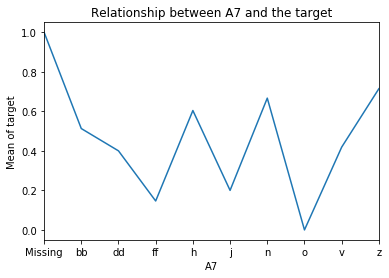

In [5]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

In [6]:
# let's create a dictionary with the target mean per category
# for the variable A7

ordered_labels = X_train.groupby(['A7'])['A16'].mean().to_dict()

ordered_labels

{'Missing': 1.0,
 'bb': 0.5128205128205128,
 'dd': 0.4,
 'ff': 0.14634146341463414,
 'h': 0.6039603960396039,
 'j': 0.2,
 'n': 0.6666666666666666,
 'o': 0.0,
 'v': 0.4187725631768953,
 'z': 0.7142857142857143}

In [7]:
# replace the labels with the target mean

X_train['A7'] = X_train['A7'].map(ordered_labels)
X_test['A7'] = X_test['A7'].map(ordered_labels)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
# let's inspect the result

X_train['A7'].head()

596    0.418773
303    0.418773
204    0.418773
351    0.146341
118    0.418773
Name: A7, dtype: float64

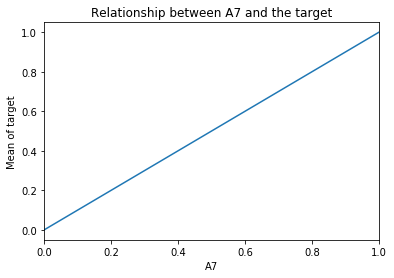

In [9]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

## Target mean encoding with Feature-Engine

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

In [11]:
# let's create the encoder

mean_enc = MeanCategoricalEncoder(variables=None)

In [12]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

mean_enc.fit(X_train, y_train)

MeanCategoricalEncoder(variables=['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10',
                                  'A12', 'A13'])

In [13]:
# variables that will be encoded

mean_enc.variables

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [14]:
# in the encoder dict we can observe the target mean per category
# per variable

mean_enc.encoder_dict_

{'A1': {'Missing': 0.5, 'a': 0.4722222222222222, 'b': 0.4388059701492537},
 'A4': {'Missing': 1.0,
  'l': 1.0,
  'u': 0.512396694214876,
  'y': 0.22608695652173913},
 'A5': {'Missing': 1.0,
  'g': 0.512396694214876,
  'gg': 1.0,
  'p': 0.22608695652173913},
 'A6': {'Missing': 1.0,
  'aa': 0.4411764705882353,
  'c': 0.45161290322580644,
  'cc': 0.7,
  'd': 0.19047619047619047,
  'e': 0.6190476190476191,
  'ff': 0.10526315789473684,
  'i': 0.2682926829268293,
  'j': 0.25,
  'k': 0.2894736842105263,
  'm': 0.4230769230769231,
  'q': 0.625,
  'r': 1.0,
  'w': 0.5,
  'x': 0.7916666666666666},
 'A7': {'Missing': 1.0,
  'bb': 0.5128205128205128,
  'dd': 0.4,
  'ff': 0.14634146341463414,
  'h': 0.6039603960396039,
  'j': 0.2,
  'n': 0.6666666666666666,
  'o': 0.0,
  'v': 0.4187725631768953,
  'z': 0.7142857142857143},
 'A9': {'f': 0.07048458149779736, 't': 0.78515625},
 'A10': {'f': 0.25092250922509224, 't': 0.7028301886792453},
 'A12': {'f': 0.4524714828897338, 't': 0.44545454545454544},
 'A1

In [15]:
# let's transform train and test set

X_train_enc = mean_enc.transform(X_train)
X_test_enc = mean_enc.transform(X_test)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [16]:
X_train_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,0.472222,46.08,3.000,0.512397,0.512397,0.451613,0.418773,2.375,0.785156,0.702830,8,0.445455,0.464853,396.0,4159
303,0.472222,15.92,2.875,0.512397,0.512397,0.625000,0.418773,0.085,0.070485,0.250923,0,0.452471,0.464853,120.0,0
204,0.438806,36.33,2.125,0.226087,0.226087,0.500000,0.418773,0.085,0.785156,0.702830,1,0.452471,0.464853,50.0,1187
351,0.438806,22.17,0.585,0.226087,0.226087,0.105263,0.146341,0.000,0.070485,0.250923,0,0.452471,0.464853,100.0,0
118,0.438806,57.83,7.040,0.512397,0.512397,0.423077,0.418773,14.000,0.785156,0.702830,6,0.445455,0.464853,360.0,1332


In [17]:
X_test_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
14,0.472222,45.83,10.50,0.512397,0.512397,0.625000,0.418773,5.000,0.785156,0.702830,7,0.445455,0.464853,0.0,0
586,0.438806,64.08,20.00,0.512397,0.512397,0.791667,0.603960,17.500,0.785156,0.702830,9,0.445455,0.464853,0.0,1000
140,0.472222,31.25,3.75,0.512397,0.512397,0.700000,0.603960,0.625,0.785156,0.702830,9,0.445455,0.464853,181.0,0
492,0.438806,39.25,9.50,0.512397,0.512397,0.423077,0.418773,6.500,0.785156,0.702830,14,0.452471,0.464853,240.0,4607
350,0.472222,26.17,2.00,0.512397,0.512397,0.250000,0.200000,0.000,0.070485,0.250923,0,0.445455,0.464853,276.0,1


# Weight of Evidence

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/univai-ghf/FeatureProcessingAndSelectionWorkshop/main/Data/creditApprovalUCI.csv')
data.dropna(inplace=True)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [3]:
# make a list with the categorical variables

vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,  # all data
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((483, 16), (207, 16))

## Weight of Evidence with pandas

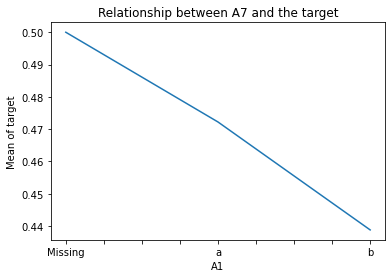

In [5]:
X_train.groupby(['A1'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

In [6]:
# Add inverse of the target to train set
X_train['A16_inv'] = 1 - X_train['A16']

<ipython-input-6-24a2eeb34fc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['A16_inv'] = 1 - X_train['A16']


In [7]:
# total numner of observations with target == 1
total_p1 = X_train['A16'].sum()

# total numner of observations with target == 0
total_p0 = X_train['A16_inv'].sum()

p1 = X_train.groupby(['A1'])['A16'].mean() / total_p1
p0 = X_train.groupby(['A1'])['A16_inv'].mean() / total_p0

woe = dict(np.log(p1 / p0))

In [8]:
woe

{'Missing': 0.20359895524123955,
 'a': 0.09237332013101507,
 'b': -0.04241042080997362}

In [9]:
# replace the labels with the woe

X_train['A1'] = X_train['A1'].map(woe)
X_test['A1'] = X_test['A1'].map(woe)

<ipython-input-9-6bfdd0caae9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['A1'] = X_train['A1'].map(woe)
<ipython-input-9-6bfdd0caae9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['A1'] = X_test['A1'].map(woe)


In [10]:
X_train['A1'].head()

596    0.092373
303    0.092373
204   -0.042410
351   -0.042410
118   -0.042410
Name: A1, dtype: float64

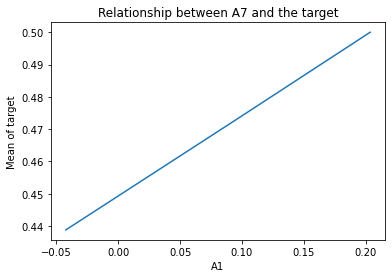

In [11]:
X_train.groupby(['A1'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

## Weight of Evidence with Feature-Engine

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['A16'], axis=1),  # predictors
    data['A16'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

In [13]:
# create the weight of evidence encoder

woe_enc = WoERatioCategoricalEncoder(
    encoding_method='woe',
    variables=['A1', 'A10', 'A12'])

In [14]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

woe_enc.fit(X_train, y_train)

WoERatioCategoricalEncoder(encoding_method='woe',
                           variables=['A1', 'A10', 'A12'])

In [15]:
# let's inspect the variables that will be encoded

woe_enc.variables

['A1', 'A10', 'A12']

In [16]:
# the encoder stores the woe values per category per variable

woe_enc.encoder_dict_

{'A1': {'Missing': 0.20359895524123955,
  'a': 0.09237332013101507,
  'b': -0.04241042080997339},
 'A10': {'f': -0.8900993186244411, 't': 1.064410534795166},
 'A12': {'f': 0.012909148776768313, 't': -0.015454610821445114}}

In [17]:
# let's transform train and test sets

X_train_enc = woe_enc.transform(X_train)
X_test_enc = woe_enc.transform(X_test)

In [18]:
X_train_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,0.092373,46.08,3.000,u,g,c,v,2.375,t,1.064411,8,-0.015455,g,396.0,4159
303,0.092373,15.92,2.875,u,g,q,v,0.085,f,-0.890099,0,0.012909,g,120.0,0
204,-0.042410,36.33,2.125,y,p,w,v,0.085,t,1.064411,1,0.012909,g,50.0,1187
351,-0.042410,22.17,0.585,y,p,ff,ff,0.000,f,-0.890099,0,0.012909,g,100.0,0
118,-0.042410,57.83,7.040,u,g,m,v,14.000,t,1.064411,6,-0.015455,g,360.0,1332


In [19]:
X_test_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
14,0.092373,45.83,10.50,u,g,q,v,5.000,t,1.064411,7,-0.015455,g,0.0,0
586,-0.042410,64.08,20.00,u,g,x,h,17.500,t,1.064411,9,-0.015455,g,0.0,1000
140,0.092373,31.25,3.75,u,g,cc,h,0.625,t,1.064411,9,-0.015455,g,181.0,0
492,-0.042410,39.25,9.50,u,g,m,v,6.500,t,1.064411,14,0.012909,g,240.0,4607
350,0.092373,26.17,2.00,u,g,j,j,0.000,f,-0.890099,0,-0.015455,g,276.0,1
